## 1. Linear Regression

### 1. 1. 데이터 로드

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_excel('hybrid_apple_FV.xlsx', usecols = 'C:M')
df1

,mean_temp,feb,mar,apr,precp,latitude,elevation,northness_c,slope,bud_burst_j,full_blm_j
0,7.764368,3.104000,7.948387,12.116667,1.678161,35.759298,310,0.352511,6.098563,84,112
1,6.635632,-0.628000,6.970968,12.900000,0.942529,35.759298,310,0.352511,6.098563,89,112
2,6.647126,-0.912000,6.887097,13.333333,1.063218,36.278721,68,0.078008,2.875978,91,113
3,8.014943,3.160000,8.170968,12.543333,3.189655,36.865479,265,0.883680,4.642735,80,112
4,7.134483,-0.424000,7.235484,13.940000,2.189655,36.865479,265,0.883680,4.642735,92,112
...,...,...,...,...,...,...,...,...,...,...,...
334,4.940022,-0.567476,4.441574,11.137223,113.934019,37.171129,365,-0.996000,9.960000,85,108
335,4.424668,2.021999,4.849334,12.092154,187.817177,36.726097,33,-0.260000,1.790000,92,117
336,7.568440,-0.992342,6.021663,13.445125,169.202010,36.726097,33,-0.260000,1.790000,95,119
337,5.238840,0.185745,6.800788,10.797986,162.403721,36.726097,33,-0.260000,1.790000,85,117


### 1. 2. 다중공선성 확인 및 변수 선정

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif = df1.drop(columns = ['full_blm_j'])

vif = pd.DataFrame()

lst = []

# 독립변수의 갯수 만큼 반복
for i in range(df_vif.shape[1]):
  v = variance_inflation_factor(df_vif.values, i)
  lst.append(v)

vif["VIF Factor"] = lst
vif["features"] = df_vif.columns

vif.sort_values(by = ["VIF Factor"])

,VIF Factor,features
7,1.227623,northness_c
1,1.866812,feb
6,4.477745,elevation
8,4.860829,slope
4,14.481845,precp
0,19.570688,mean_temp
2,37.173395,mar
3,86.531478,apr
9,383.265584,bud_burst_j
5,512.274550,latitude


Text(0, 0.5, 'full_blm_j')

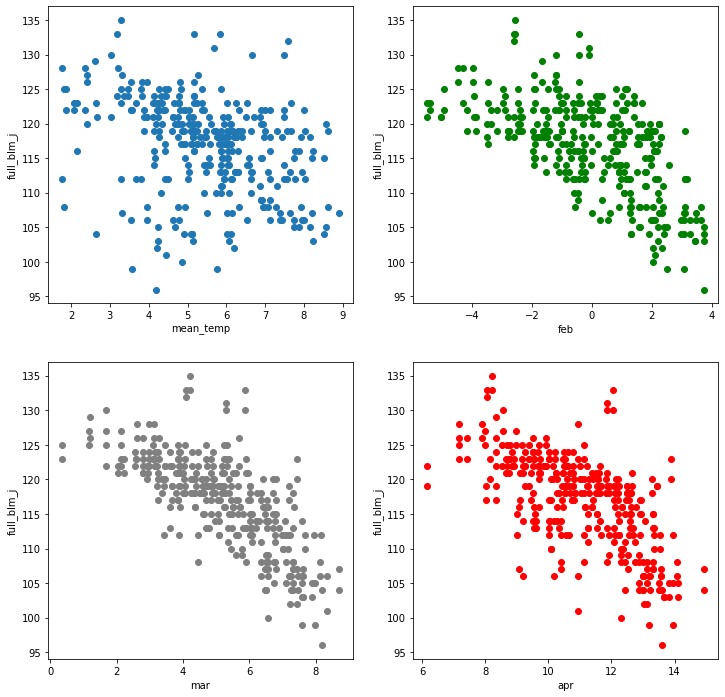

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)
# ax.grid(True)

plt.subplot(2, 2, 1)
plt.plot(df1['mean_temp'].ravel(),df1['full_blm_j'].ravel(), 'o',)
plt.xlabel('mean_temp')
plt.ylabel('full_blm_j')
### northness_c, precp, slope, elevation(애매),

plt.subplot(2, 2, 2)
plt.plot(df1['feb'].ravel(), df1['full_blm_j'].ravel(), 'o', color = 'green')
plt.xlabel('feb')
plt.ylabel('full_blm_j')

plt.subplot(2, 2, 3)
plt.plot(df1['mar'].ravel(), df1['full_blm_j'].ravel(), 'o', color = 'grey')
plt.xlabel('mar')
plt.ylabel('full_blm_j')

plt.subplot(2, 2, 4)
plt.plot(df1['apr'].ravel(),df1['full_blm_j'].ravel(), 'o', color = 'red')
plt.xlabel('apr')
plt.ylabel('full_blm_j')

# plt.subplot(3, 2, 5)


# # # plt.subplot(3, 1, 4)
# plt.plot(df1['full_blm_j'].ravel(), df1['mean_temp'].ravel(), 'o', color = 'black')

Text(0, 0.5, 'full_blm_j')

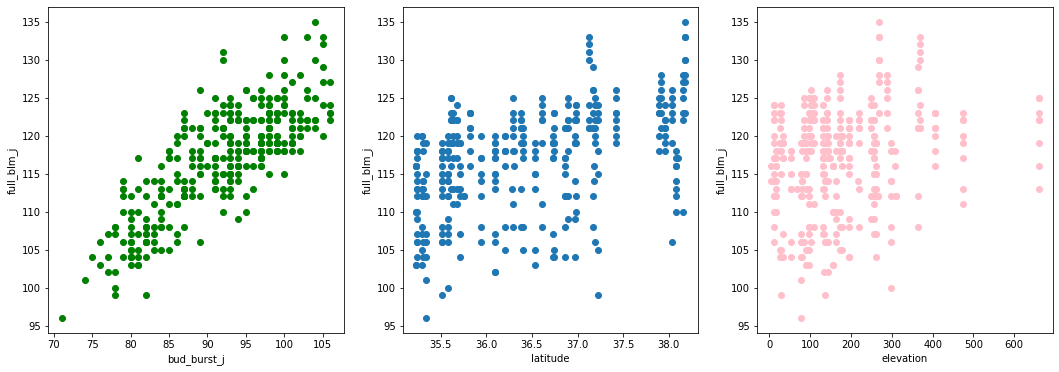

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
fig.set_figheight(6)
fig.set_figwidth(18)
# ax.grid(True)

plt.subplot(1, 3, 1)
plt.plot(df1['bud_burst_j'].ravel(), df1['full_blm_j'].ravel(), 'o', color = 'green')
plt.xlabel('bud_burst_j')
plt.ylabel('full_blm_j')
### northness_c, precp, slope, elevation(애매),

plt.subplot(1, 3, 2)
plt.plot(df1['latitude'].ravel(),df1['full_blm_j'].ravel(), 'o',)
plt.xlabel('latitude')
plt.ylabel('full_blm_j')

plt.subplot(1, 3, 3)
plt.plot(df1['elevation'].ravel(), df1['full_blm_j'].ravel(), 'o', color = 'pink')
plt.xlabel('elevation')
plt.ylabel('full_blm_j')

Text(0, 0.5, 'full_blm_j')

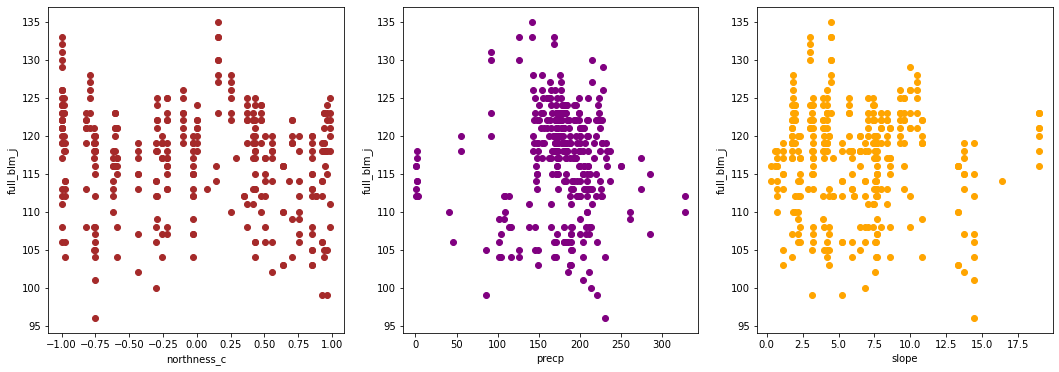

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
fig.set_figheight(6)
fig.set_figwidth(18)

plt.subplot(1, 3, 1)
plt.plot(df1['northness_c'].ravel(),df1['full_blm_j'].ravel(), 'o', color = 'Brown')
plt.xlabel('northness_c')
plt.ylabel('full_blm_j')
### northness_c, precp, slope, elevation(애매),

plt.subplot(1, 3, 2)
plt.plot(df1['precp'].ravel(), df1['full_blm_j'].ravel(), 'o', color = 'purple')
plt.xlabel('precp')
plt.ylabel('full_blm_j')

plt.subplot(1, 3, 3)
plt.plot(df1['slope'].ravel(), df1['full_blm_j'].ravel(), 'o', color = 'orange')
plt.xlabel('slope')
plt.ylabel('full_blm_j')

In [7]:
# 1.
df_new = df1.loc[:, ['mean_temp', 'bud_burst_j', 'full_blm_j']]

# 2.
# df_new = df1.loc[:, ['mar', 'latitude', 'bud_burst_j', 'full_blm_j' ]]

# 3.
# df_new = df1.loc[:, ['feb', 'mar', 'apr', 'elevation', 'latitude', 'full_blm_j' ]]

# 4.
# df_new = df1.loc[:, ['mean_temp', 'mar', 'latitude', 'bud_burst_j', 'full_blm_j' ]]

# 5.
# df_new = df1.loc[:, ['mean_temp', 'feb', 'mar', 'bud_burst_j', 'full_blm_j' ]]

# 6.
# df_new = df1.loc[:, ['mean_temp', 'feb', 'mar', 'apr', 'elevation', 'latitude', 'bud_burst_j', 'full_blm_j' ]]

df_new


,mean_temp,bud_burst_j,full_blm_j
0,7.764368,84,112
1,6.635632,89,112
2,6.647126,91,113
3,8.014943,80,112
4,7.134483,92,112
...,...,...,...
334,4.940022,85,108
335,4.424668,92,117
336,7.568440,95,119
337,5.238840,85,117


import os

current_path = os.getcwd()
os.chdir('D:\\06 그룹프로젝트 정리-지수영\\[ML] 머신러닝 기술을 이용한 사과 개화기 예측\\6')

current_path = os.getcwd()
current_path

### 1. 3. 데이터셋 분할

In [8]:
#독립(X), 종속(y) 변수 지정
count = len(df_new.columns) - 1 # 종속변수 제외

X1 = df_new.iloc[:, 0:count].values #values = columns에 있는 값들을 가져옴..
y1 = df_new.iloc[:, -1].values

#Numpy형태를 DataFrame형태로 변환
X = pd.DataFrame(X1)
y = pd.DataFrame(y1)

#컬럼명 변경
# X.columns=['mean_temp', 'mar', 'latitude', 'bud_burst_j']
X.columns = df_new.columns[:count]
y.columns=['full_blm_j']

print(X)
print(y)

     mean_temp  bud_burst_j
0     7.764368         84.0
1     6.635632         89.0
2     6.647126         91.0
3     8.014943         80.0
4     7.134483         92.0
..         ...          ...
334   4.940022         85.0
335   4.424668         92.0
336   7.568440         95.0
337   5.238840         85.0
338   5.097200         80.0

[339 rows x 2 columns]
     full_blm_j
0           112
1           112
2           113
3           112
4           112
..          ...
334         108
335         117
336         119
337         117
338         104

[339 rows x 1 columns]


In [9]:
#train, test 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size = 0.75, 
                                                    random_state = 2022, 
                                                    shuffle = True
                                                    )
#데이터 형태 확인
print(X_train.shape)
print(X_test.shape )  
print(y_train.shape)  
print(y_test.shape)

(254, 2)
(85, 2)
(254, 1)
(85, 1)


### 1. 4. 모델에 적용

C:\Users\image2\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['axis']
  warnings.warn(msg, ValueWarning)
C:\Users\image2\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


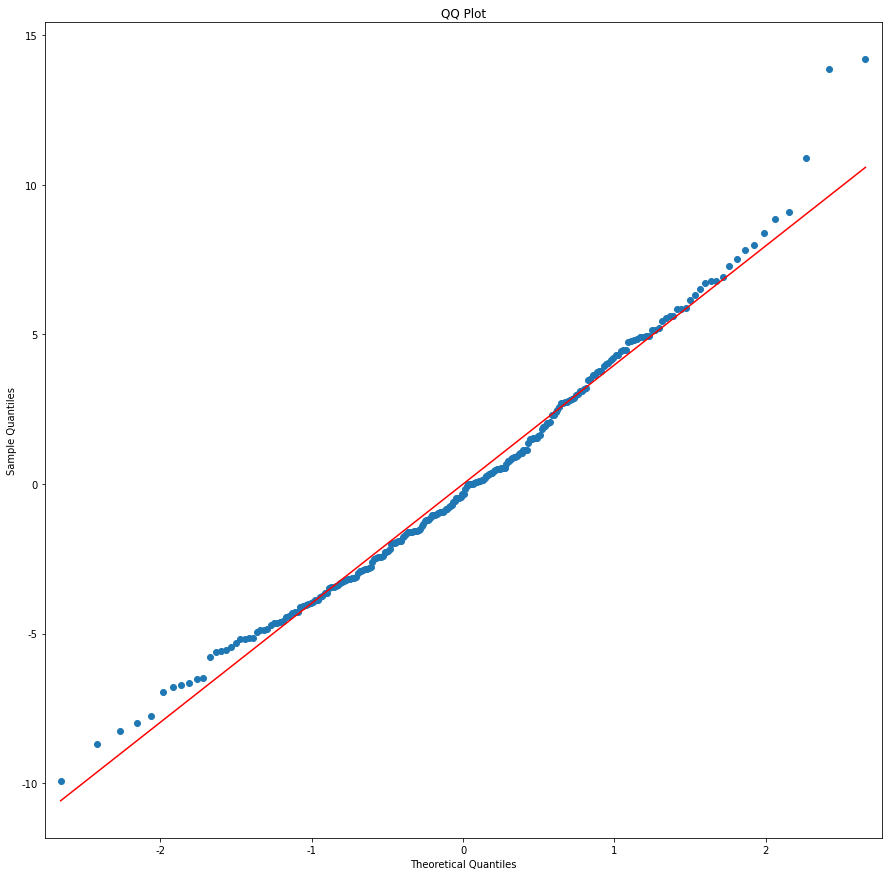

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.font_manager as fm
import statsmodels.api as sm

X_train = sm.add_constant(X_train) #X_train 데이터에 콘스탄트 추가
model = sm.OLS(y_train, X_train, axis=1) #다중선형회귀 모델의 독립변수, 종속변수 지정: train데이터
model_trained = model.fit() #모델에 적용

#확률오차의 정규성 확인: 다중선형회귀의 기본 가정(정규성, 등분산성, 독립성)에 대한 검정
model_residuals = model_trained.resid

#시각화
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(1,1)
fig.set_figheight(15)
fig.set_figwidth(15)

sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

C:\Users\image2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Fitted values'), Text(0, 0.5, 'Residuals')]

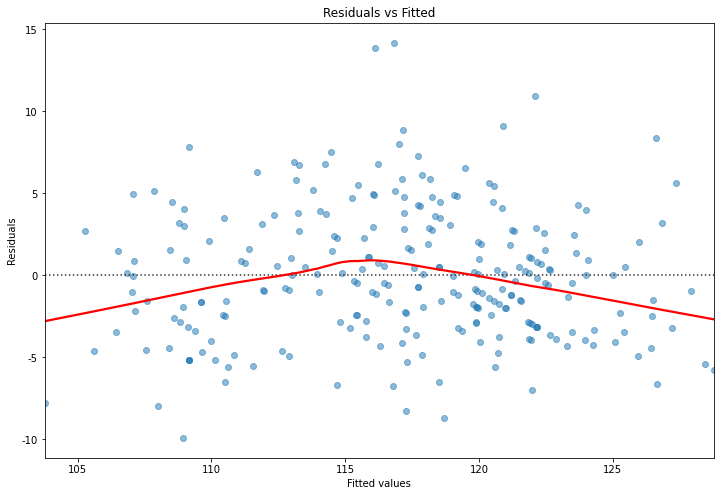

In [11]:
#확률오차의 등분산성 확인
model_fitted_y=model_trained.fittedvalues

fig, ax = plt.subplots(1,1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws={'alpha': 0.5},
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

In [12]:
#선형회귀모델 결과 요약
model_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             full_blm_j   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     232.5
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           7.38e-58
Time:                        15:47:29   Log-Likelihood:                -711.25
No. Observations:                 254   AIC:                             1428.
Df Residuals:                     251   BIC:                             1439.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          59.0324      3.551     16.623      0.000      52.038      66.027
mean_temp      -0.7242      0.168     -4.310      0.000      -1.055      -0.393
bud_burst_j     0.6728      0.035     19.385      0.000       0.604       0.741
==============================================================================
Omnibus:                       10.481   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.619
Skew:                           0.458   Prob(JB):                      0.00494
Kurtosis:                       3.404   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

y=0.649438x+(41.080677)


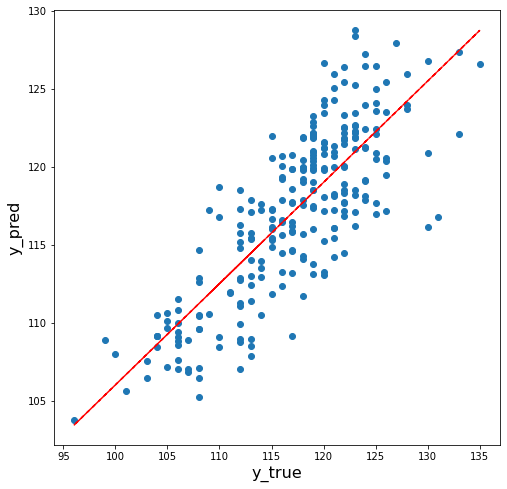

In [13]:
#y_train plot
y_train_pred = model_trained.fittedvalues

#DataFrame을 1d array로 변환
y_train = np.ravel(y_train)

# 추세선을 위한 계산 - 1차원의 polynomial(다항식)을 계산하기 위한 코드입니다.
z = np.polyfit(y_train, y_train_pred, 1) # (X,Y,차원) 정의
p = np.poly1d(z) # 1차원 다항식에 대한 연산을 캡슐화

# 그래프 그리기
pylab.figure(figsize=(8,8))
pylab.plot(y_train, y_train_pred,'o') #산점도를 뜻할 때 'o'라고 합니다.
pylab.plot(y_train, p(y_train),"r--")
pylab.xlabel('y_true', size=16)
pylab.ylabel('y_pred', size=16)

# 방정식 계산
print( "y=%.6fx+(%.6f)"%(z[0],z[1]))

pylab.savefig('Linear Regression_1.jpg', dpi = fig.dpi)

y=0.666124x+(38.945189)


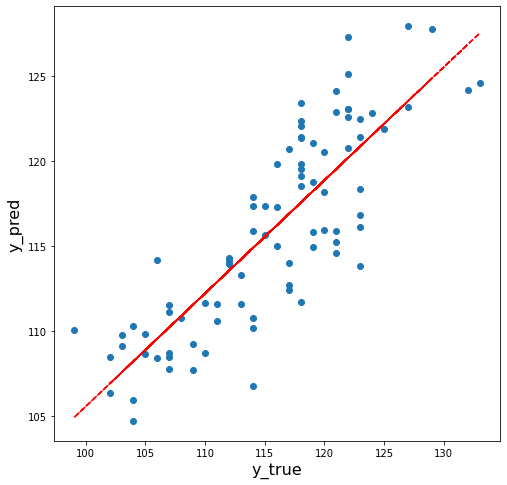

In [14]:
#Test데이터 적용
X_test = sm.add_constant(X_test)
y_test_pred = model_trained.predict(X_test)

#DataFrame을 1d array로 변환
y_test = np.ravel(y_test)

z = np.polyfit(y_test, y_test_pred, 1) # (X,Y,차원) 정의
p = np.poly1d(z) # 1차원 다항식에 대한 연산을 캡슐화

# 그래프 그리기
pylab.figure(figsize=(8,8))
pylab.plot(y_test, y_test_pred,'o') #산점도를 뜻할 때 'o'라고 합니다.
pylab.plot(y_test, p(y_test),"r--")
pylab.xlabel('y_true', size=16)
pylab.ylabel('y_pred', size=16)

# 방정식 계산
print( "y=%.6fx+(%.6f)"%(z[0],z[1]))
pylab.savefig('Linear Regression_2.jpg', dpi = fig.dpi)

In [15]:
#평균 절대 백분율 오차
def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true-y_pred)/y_true))
print(mean_absolute_percentage_error(y_test, y_test_pred))

0.028480081312005048


In [16]:
#통계량 비교
from sklearn.metrics import accuracy_score, recall_score, precision_score, mean_squared_error, mean_absolute_error, r2_score
print('------Train-----')
print('Training MSE: {:.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(y_train, y_train_pred)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred)))
print('Training R2: {:.3f}'.format(r2_score(y_train, y_train_pred)))
print('------Test------')
print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_test, y_test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, y_test_pred)))

------Train-----
Training MSE: 15.839
Training RMSE: 3.980
Training MAE: 3.155
Training MAPE: 0.027
Training R2: 0.649
------Test------
Testing MSE: 16.242
Testing RMSE: 4.030
Testing MAE: 3.268
Testing MAPE: 0.028
Testing R2: 0.695


### 2. RandomForest Regression (RFR)

### 2. 1. 데이터 로드

In [17]:
# df = pd.read_excel('./hybrid_apple_FV.xlsx', usecols = 'C:M')
df = df1
df

,mean_temp,feb,mar,apr,precp,latitude,elevation,northness_c,slope,bud_burst_j,full_blm_j
0,7.764368,3.104000,7.948387,12.116667,1.678161,35.759298,310,0.352511,6.098563,84,112
1,6.635632,-0.628000,6.970968,12.900000,0.942529,35.759298,310,0.352511,6.098563,89,112
2,6.647126,-0.912000,6.887097,13.333333,1.063218,36.278721,68,0.078008,2.875978,91,113
3,8.014943,3.160000,8.170968,12.543333,3.189655,36.865479,265,0.883680,4.642735,80,112
4,7.134483,-0.424000,7.235484,13.940000,2.189655,36.865479,265,0.883680,4.642735,92,112
...,...,...,...,...,...,...,...,...,...,...,...
334,4.940022,-0.567476,4.441574,11.137223,113.934019,37.171129,365,-0.996000,9.960000,85,108
335,4.424668,2.021999,4.849334,12.092154,187.817177,36.726097,33,-0.260000,1.790000,92,117
336,7.568440,-0.992342,6.021663,13.445125,169.202010,36.726097,33,-0.260000,1.790000,95,119
337,5.238840,0.185745,6.800788,10.797986,162.403721,36.726097,33,-0.260000,1.790000,85,117


In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print(f'Train set dimension is {X_train.shape}')
print(f'Test set dimension is {X_test.shape}')

print(X.shape)
print(y.shape)

if X_train.shape[0] != y_train.shape[0]:
  print("X and y rows are mismatched, check dataset again")

Train set dimension is (254, 3)
Test set dimension is (85, 3)
(339, 2)
(339, 1)


### 2. 2. RFR 통계모델 테스트

In [19]:
#하이퍼파라미터 auto search
from IPython.display import display, HTML
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

#독립(X), 종속(y) 변수 지정
X1 = df_new.iloc[:, 0:count].values #values = columns에 있는 값들을 가져옴..
y1 = df_new.iloc[:, -1].values

#Numpy형태를 DataFrame형태로 변환
X = pd.DataFrame(X1)
y = pd.DataFrame(y1)

#컬럼명 변경
# X.columns=['mean_temp', 'mar', 'latitude', 'bud_burst_j']
X.columns = df_new.columns[:count]
y.columns=['full_blm_j']

#train, test 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size = 0.75, 
                                                    random_state = 2022, 
                                                    shuffle = True
                                                    )

rfr = RandomForestRegressor(random_state=2022)
param_grid = {
    'max_depth':[10, 50, 100, 200], #값 변경 가능
    'max_leaf_nodes':[50,100,200],  #값 변경 가능
    'criterion':['mae','mse']
}

CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=10, verbose=1, n_jobs=-1, scoring='r2')
CV_rfr.fit(X_train, y_train)

# 최적의 하이퍼파라미터값을 적용한 RFR모델
best_rfr = CV_rfr.best_estimator_
best_rfr.fit(X_train, y_train) # 최적 RFR모델에 훈련데이터 적용

# 최적 RFR모델을 이용한 결과 예측
y_train_pred = best_rfr.predict(X_train)
y_pred = best_rfr.predict(X_test)

# 통계량 계산
r2score = r2_score(y_true=y_test, y_pred=y_pred) # R-squared score
mse = mean_squared_error(y_true=y_test, y_pred=y_pred) # MSE (Mean Squared Error)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred) # MAE (Mean Absolute Error)

# 테스트 데이터에 대한 RFR 모델의 통계량
print('Random Forest Regressor')
print(f"R2 score:{r2score:0.4f}", f"MSE:{mse:0.4f}", f"MAE:{mae:0.4f}", sep=' | ')

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Random Forest Regressor
R2 score:0.7219 | MSE:14.8029 | MAE:2.9845


### 2. 3 시각화

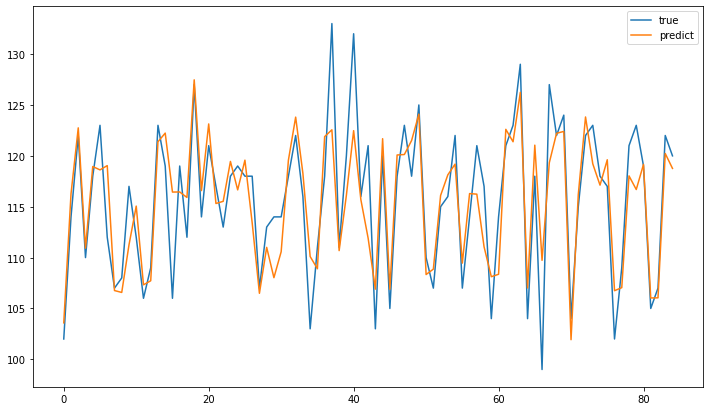

In [20]:
answer = pd.DataFrame(y_test.reset_index())
del answer['index']

pylab.figure(figsize = (12, 7))
plt.plot(answer, label = "true")
plt.plot(best_rfr.predict(X_test), label = "predict")
plt.legend()

pylab.savefig('RandomForest Regression_성능.jpg', dpi = fig.dpi)

y=0.799473x+(23.254979)
The training r2 is: 0.8526


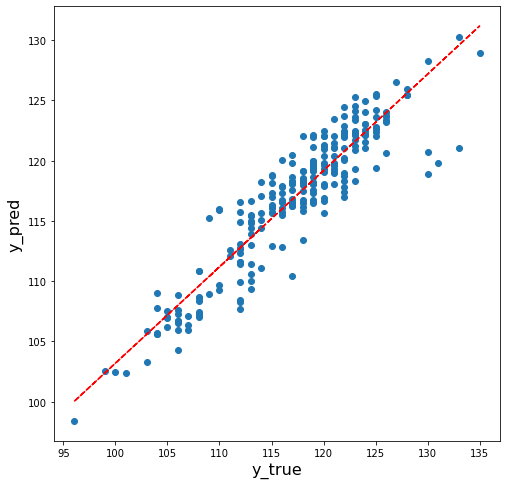

In [21]:
# y_train plot

#R-squared 계산
r2score_train = r2_score(y_train, y_train_pred) # R-squared score
r2score_train

#DataFrame을 1d array로 변환
y_train_np = np.ravel(y_train)

# 추세선을 위한 계산 - 1차원의 polynomial(다항식)을 계산하기 위한 코드
z = np.polyfit(y_train_np, y_train_pred, 1) # (X,Y,차원) 정의
p = np.poly1d(z) # 1차원 다항식에 대한 연산을 캡슐화

# 그래프 그리기
pylab.figure(figsize=(8,8))
pylab.plot(y_train_np, y_train_pred,'o') #산점도를 뜻할 때 'o'
pylab.plot(y_train_np, p(y_train_np),"r--")
pylab.xlabel('y_true', size=16)
pylab.ylabel('y_pred', size=16)

# 방정식 계산
print( "y=%.6fx+(%.6f)"%(z[0],z[1]))
print('The training r2 is: %.4f'% r2score_train)

pylab.savefig('Randomforest regression_1.jpg', dpi = fig.dpi)

y=0.706861x+(33.727958)
The testing r2 is: 0.7219


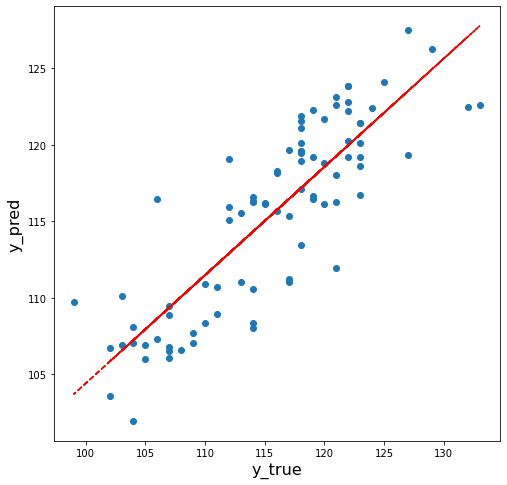

In [22]:
# y_test plot 준비

#DataFrame을 1d array로 변환
y_true = np.ravel(y_test)

# 추세선을 위한 계산 - 1차원의 polynomial(다항식)을 계산하기 위한 코드입니다.
z = np.polyfit(y_true, y_pred, 1) # (X,Y,차원) 정의
p = np.poly1d(z) # 1차원 다항식에 대한 연산을 캡슐화

# 그래프 그리기
pylab.figure(figsize=(8,8))
pylab.plot(y_true, y_pred,'o') #산점도를 뜻할 때 'o'라고 합니다.
pylab.plot(y_true, p(y_true),"r--")
pylab.xlabel('y_true', size=16)
pylab.ylabel('y_pred', size=16)

# 방정식 계산
print( "y=%.6fx+(%.6f)"%(z[0],z[1]))
print('The testing r2 is: %.4f'% r2score)

pylab.savefig('Randomforest regression_2.jpg', dpi = fig.dpi)

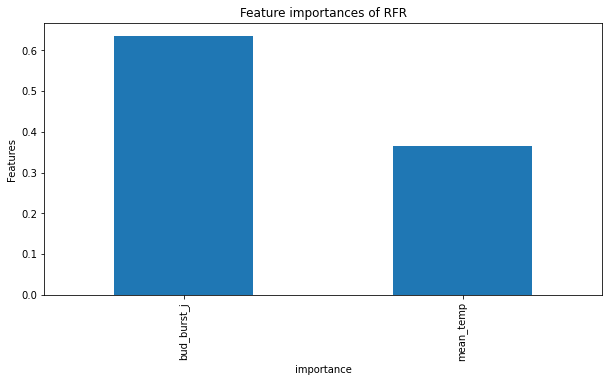

In [23]:
# Random Forest Feature Ranking

#Feature importance 시각화
f_list = list(X.columns)
f_importance = pd.Series(best_rfr.feature_importances_, index=f_list).sort_values(ascending=False)
f_importance

plt.subplots(figsize=(10,5) )
f_importance.plot(kind='bar')
plt.title("Feature importances of RFR")
plt.xlabel("importance")
plt.ylabel("Features")
plt.show()

In [24]:
df_columns = np.ravel(df_new.columns[:count])

# Excel파일 제대로 열리는지 확인
df = pd.read_excel('./apple_test.xlsx') #copy path
df

apple_test1 = df.loc[:, df_columns] #values = columns에 있는 값들을 가져옴..

#데이터프레임으로 변환
# apple_test1 = pd.DataFrame(X1)
# apple_test1.columns=['mean_temp', 'mar', 'latitude', 'bud_burst_j']

#Data scaling
# scaler = MinMaxScaler()
# apple_test1 = scaler.fit_transform(apple_test1)

#모델을 이용해서 예측
RFR_pred = best_rfr.predict(apple_test1)
RFR_pred1 = pd.DataFrame(RFR_pred)
RFR_pred1.columns = ['predict']

RFR_pred1['True'] = df.loc[:, ['full_blm_j']]

## 3. XGboost Regression (XGBR)

In [25]:
#독립(X), 종속(y) 변수 지정
X1 = df_new.iloc[:, 0:count].values #values = columns에 있는 값들을 가져옴..
y1 = df_new.iloc[:, -1].values

#Numpy형태를 DataFrame형태로 변환
X = pd.DataFrame(X1)
y = pd.DataFrame(y1)

#컬럼명 변경
# X.columns=['mean_temp', 'mar', 'latitude', 'bud_burst_j']
X.columns = df_new.columns[0:count]
y.columns=['full_blm_j']

#train, test 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size = 0.75, 
                                                    random_state = 2022, 
                                                    shuffle = True
                                                    )

scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test) #StandardSclaer를 X_train에 적용

print(f'Train set dimension is {X_train.shape}')
print(f'Test set dimension is {X_test.shape}')

print(X.shape)
print(y.shape)

if X_train.shape[0] != y_train.shape[0]:
  print("X and y rows are mismatched, check dataset again")

Train set dimension is (254, 2)
Test set dimension is (85, 2)
(339, 2)
(339, 1)


In [26]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
print(xgb_grid.best_estimator_)

best_XGboost = xgb_grid.best_estimator_
best_XGboost.fit(X_train, y_train)

y_train_pred = best_XGboost.predict(X_train)
y_pred = best_XGboost.predict(X_test)

r2score = r2_score(y_true=y_test, y_pred=y_pred) # R-squared score
mse = mean_squared_error(y_true=y_test, y_pred=y_pred) # MSE (Mean Squared Error)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred) # MAE (Mean Absolute Error)

print('XGBRegressor')
print(f"R2 score:{r2score:0.4f}", f"MSE:{mse:0.4f}", f"MAE:{mae:0.4f}", sep=' | ')

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[15:47:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:47:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


0.5390838339480803
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
         

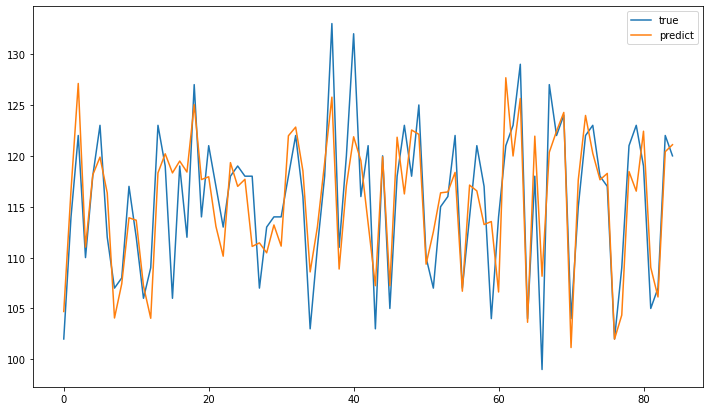

In [27]:
#모델 성능 측정
answer = pd.DataFrame(y_test.reset_index())
del answer["index"]

pylab.figure(figsize=(12, 7))
plt.plot(answer, label="true")
plt.plot(best_XGboost.predict(X_test), label="predict")
plt.legend()

pylab.savefig('XGBoost_Regression_성능.jpg', dpi = fig.dpi)

y=0.790778x+(24.524131)
The training r2 is: 0.82133


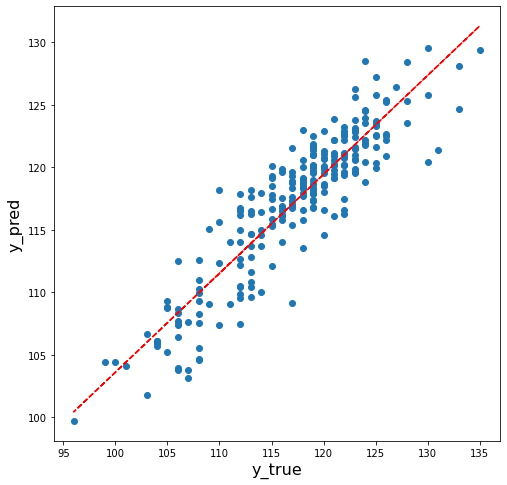

In [28]:
# Y_train plot

#R-squared 계산
r2score_train = r2_score(y_train, y_train_pred) # R-squared score
r2score_train

#DataFrame을 1d array로 변환
y_train_np = np.ravel(y_train)

# 추세선을 위한 계산 - 1차원의 polynomial(다항식)을 계산하기 위한 코드입니다.
z = np.polyfit(y_train_np, y_train_pred, 1) # (X,Y,차원) 정의
p = np.poly1d(z) # 1차원 다항식에 대한 연산을 캡슐화

# 그래프 그리기
pylab.figure(figsize=(8,8))
pylab.plot(y_train_np, y_train_pred,'o') #산점도를 뜻할 때 'o'라고 합니다.
pylab.plot(y_train_np, p(y_train_np),"r--")
pylab.xlabel('y_true', size=16)
pylab.ylabel('y_pred', size=16)

# 방정식 계산
print( "y=%.6fx+(%.6f)"%(z[0],z[1]))
print('The training r2 is: %.5f'% r2score_train)

pylab.savefig('XGBoost regression_1.jpg', dpi = fig.dpi)

y=0.717980x+(32.556731)
The testing r2 is: 0.6776


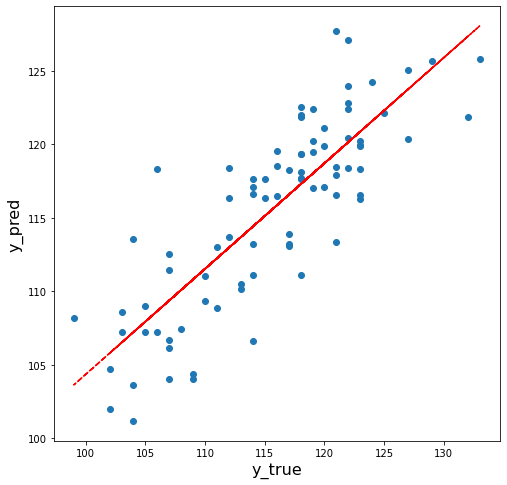

In [29]:
# Y_test plot 준비

#R-squared 계산
r2score_test = r2_score(y_test, y_pred) # R-squared score
r2score_test

#DataFrame을 1d array로 변환
y_true = np.ravel(y_test)

# 추세선을 위한 계산 - 1차원의 polynomial(다항식)을 계산하기 위한 코드입니다.
z = np.polyfit(y_true, y_pred, 1) # (X,Y,차원) 정의
p = np.poly1d(z) # 1차원 다항식에 대한 연산을 캡슐화

# 그래프 그리기
pylab.figure(figsize=(8,8))
pylab.plot(y_true, y_pred,'o') #산점도를 뜻할 때 'o'라고 합니다.
pylab.plot(y_true, p(y_true),"r--")
pylab.xlabel('y_true', size=16)
pylab.ylabel('y_pred', size=16)

# 방정식 계산
print( "y=%.6fx+(%.6f)"%(z[0],z[1]))
print('The testing r2 is: %.4f'% r2score_test)

pylab.savefig('XGBoost regression_2.jpg', dpi = fig.dpi)

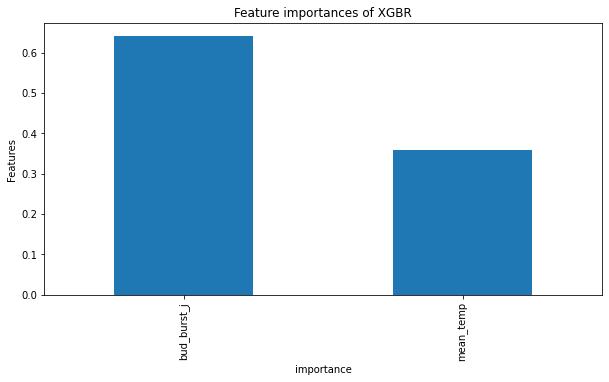

In [30]:
# XGboost Feature Ranking

#Feature importance 시각화
f_list = list(X.columns)
f_importance = pd.Series(best_XGboost.feature_importances_, index=f_list).sort_values(ascending=False)
f_importance

plt.subplots(figsize=(10,5) )
f_importance.plot(kind='bar')
plt.title("Feature importances of XGBR")
plt.xlabel("importance")
plt.ylabel("Features")
plt.show()

# Excel파일 제대로 열리는지 확인
df = pd.read_excel('./apple_test.xlsx') #copy path
df
#print(df)

#X변수 11개(2022-05-16일자)
X = df.loc[:, df_columns] #values = columns에 있는 값들을 가져옴..
#print(X1)

#데이터프레임으로 변환
# X = pd.DataFrame(X1)
X.columns=[df_columns]

#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

scaler = StandardScaler()
scaler.fit(X)

#예측
XGB_pred = best_XGboost.predict(X)
XGB_pred1 = pd.DataFrame(XGB_pred)
XGB_pred1['True'] = df.loc[:, ['full_blm_j']]

XGB_pred1.columns = ['predict', 'True']

XGB_pred1